In [1]:
%matplotlib inline
import data_utils as du
import learning_utils as lu

C:\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data_file = 'kaggle_data/train_data.csv'
labels_file = 'kaggle_data/train_labels.csv'

data, labels = du.Import_Data(data_file, labels_file)

Imported data (4363, 264) and labels (4363, 1).


In [3]:
clean_data = du.Remove_Zero_Variance(data)

Zero variance features removed from data. Input shape: (4363, 264). Output shape: (4363, 260).


In [4]:
#features = du.Select_Features_From_Model(clean_data, labels)
features = clean_data

In [5]:
#normalized_features = du.Normalize(features, 'min-max')
normalized_features = du.Standardize(features)
shuffled_features, shuffled_labels = du.Shuffle(normalized_features, labels)

Data successfully shuffled


In [6]:
resampled_features, resampled_labels = du.Resample(shuffled_features, shuffled_labels, 'TomekLinks')

C:\Anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Resampling complete. Sample amount changed from 4363 to 4270


In [7]:
train_features, test_features, train_labels, test_labels = du.Split_Data(resampled_features, resampled_labels)

Data successfully split. Test data ratio = 0.3


In [8]:
model_svm = lu.Learn_SVM(train_features, train_labels)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   19.7s finished


Best score: 0.6446972231515558, using parameters: {'C': 0.01}


In [9]:
predictions = lu.Predict(model_svm, test_features)
#print(predictions)

In [10]:
accuracy = lu.Accuracy_Score(test_labels, predictions)

Accuracy: 0.6619828259172521


In [11]:
#model_mlp = lu.Learn_Multilayer_Perceptron(train_features, train_labels, 0.0001)
#mlp_score = lu.Evaluate_NN_Performance(model_mlp, test_features, test_labels)

[[563  34   6   4   0   6   1   3   1   1]
 [ 56 112  14   3   3   4   0   1   1   0]
 [ 15   5  77   1   2   2   0   0   1   0]
 [ 24  12   2  38   1   5   0   0   0   1]
 [ 21   8   3   3  17   2   0   0   3   1]
 [ 33   8  14   1   1  20   1   1   0   0]
 [ 17   3   2   2   5   1   0   2   1   1]
 [ 45   0   0   3   1   2   0  13   0   0]
 [  5   3   4   1   1   3   0   1   8   0]
 [ 15   1   0   3   0   1   0   1   0   0]]


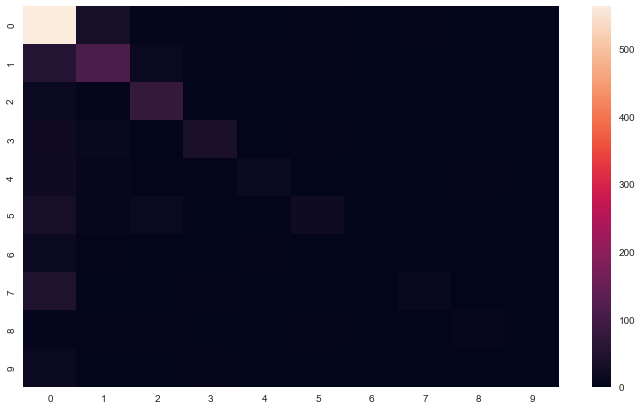

In [12]:
import visu_utils as vu
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_labels,predictions)
vu.plot_confusion_mat(mat, [12,7])
print(mat)

## Predict labels for submission

We have established that C=0.01 is the best parameter. Now we can retrain the model with all training data, and then predict labels from test data that we submit to Kaggle.

In [ ]:
model_svm = lu.Learn_SVM(resampled_features, resampled_labels)

In [19]:
import pandas as pd
import numpy as np
validation_data_file = 'kaggle_data/test_data.csv'
validation_data = pd.read_csv(data_file,header=None)
validation_data = du.Remove_Zero_Variance(validation_data)
validation_data = du.Standardize(validation_data)


predictions_to_submit = lu.Predict(model_svm,validation_data)
print(predictions_to_submit.shape)
np.savetxt("SVM_predictions_to_submit.csv", predictions_to_submit, delimiter=",")

Zero variance features removed from data. Input shape: (4363, 264). Output shape: (4363, 260).
(4363,)
